# Time Series Work with Unemployment DAta

A quick look at the unemployment rate data as is available on [FRED](https://fred.stlouisfed.org/). 

In [89]:
#import files
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from datetime import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import math

In [54]:
df = pd.read_csv('UNRATE.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    874 non-null    object 
 1   UNRATE  874 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.8+ KB


In [56]:
#It looks like the first of the month, not the first "business" month. 
df.DATE.value_counts()

1959-01-01    1
1986-11-01    1
2015-05-01    1
2000-08-01    1
1968-10-01    1
             ..
1962-08-01    1
2020-04-01    1
1948-08-01    1
1982-09-01    1
2009-06-01    1
Name: DATE, Length: 874, dtype: int64

# Plotting
Plot the time series, along with any logical or necessary differences to get a stationary dataset.

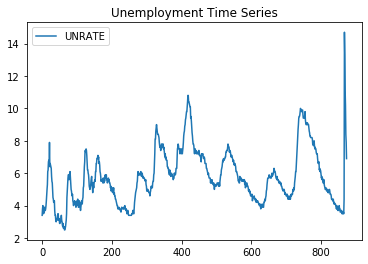

In [57]:
df.plot()
plt.title('Unemployment Time Series')
plt.show()

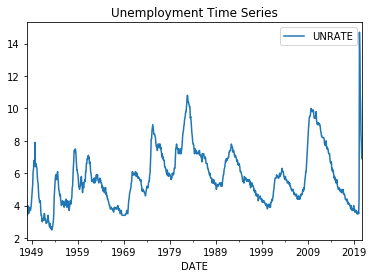

In [58]:
#use a date time index for better evaluation. 
df.index = pd.DatetimeIndex(df.DATE, freq = 'MS')
df.plot()
plt.title('Unemployment Time Series')
plt.show()

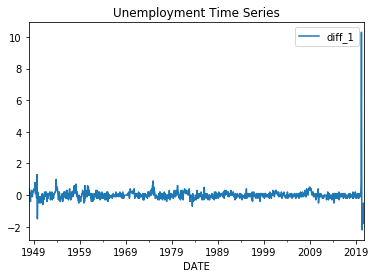

In [59]:
#I need a stationary pov. Plot the difference, see if it helps.
df['diff_1'] = df.UNRATE - df.UNRATE.shift()
df.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

Generate and interpret a PACF for the time series (and/or its differences).

Text(0.5, 1.0, 'Unemployment PACF')

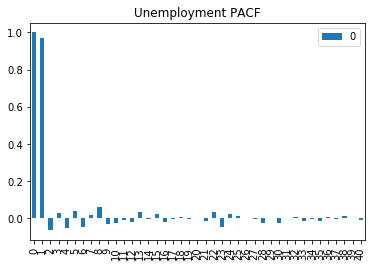

In [60]:
x_acf = pd.DataFrame(pacf(df.UNRATE))
x_acf.plot(kind='bar')
plt.title("Unemployment PACF")

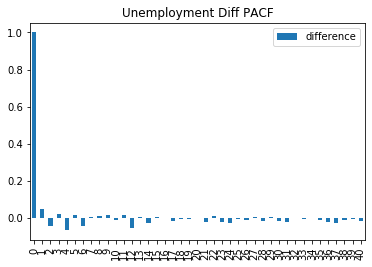

In [61]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Unemployment Diff PACF")
plt.legend(['difference'])

# Modeling
Generate five ARIMA specifications and evaluate their efficacy at modeling your data.


In [71]:
#One
model = ARIMA(df.UNRATE, order=(0,1,0))
model_fit = model.fit()

#a values dictionary for comparison later.
AICs = {"one" : model_fit.aic}

#print the summary
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  873
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -487.873
Method:                           css   S.D. of innovations              0.423
Date:                Fri, 04 Dec 2020   AIC                            979.746
Time:                        10:07:41   BIC                            989.290
Sample:                    02-01-1948   HQIC                           983.397
                         - 10-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.014      0.280      0.780      -0.024       0.032
Residuals Description
count    8.730000e+02
mean     6.719616e-10
std      4.233657e-01
min     -2.204009e+00
25%     -1.040092e-01

In [72]:
#Two
model = ARIMA(df.UNRATE, order=(1,0,0))
model_fit = model.fit()

AICs['Two'] = model_fit.aic

print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())


                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  874
Model:                     ARMA(1, 0)   Log Likelihood                -483.193
Method:                       css-mle   S.D. of innovations              0.420
Date:                Fri, 04 Dec 2020   AIC                            972.387
Time:                        10:09:51   BIC                            986.706
Sample:                    01-01-1948   HQIC                           977.864
                         - 10-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7227      0.449     12.737      0.000       4.842       6.603
ar.L1.UNRATE     0.9695      0.008    118.504      0.000       0.953       0.986
                                    Roots   

In [73]:
#Three
model = ARIMA(df.UNRATE, order=(1,0,1))
model_fit = model.fit(disp=0)

AICs['Three'] = model_fit.aic
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  874
Model:                     ARMA(1, 1)   Log Likelihood                -481.408
Method:                       css-mle   S.D. of innovations              0.419
Date:                Fri, 04 Dec 2020   AIC                            970.816
Time:                        10:11:11   BIC                            989.909
Sample:                    01-01-1948   HQIC                           978.120
                         - 10-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7246      0.424     13.515      0.000       4.894       6.555
ar.L1.UNRATE     0.9653      0.009    106.924      0.000       0.948       0.983
ma.L1.UNRATE     0.0684      0.036      1.89

In [74]:
#Four
model_111 = ARIMA(df.UNRATE, order=(1,1,1))
model_111_fit = model_111.fit()

AICs['Four'] = model_111_fit.aic
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  873
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -483.324
Method:                       css-mle   S.D. of innovations              0.421
Date:                Fri, 04 Dec 2020   AIC                            974.647
Time:                        10:11:55   BIC                            993.735
Sample:                    02-01-1948   HQIC                           981.949
                         - 10-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0042      0.015      0.284      0.777      -0.025       0.033
ar.L1.D.UNRATE    -0.8568      0.100     -8.609      0.000      -1.052      -0.662
ma.L1.D.UNRATE     0.9120      0.085

In [76]:
#Five
model = ARIMA(df.UNRATE, order=(3,1,3))
model_fit = model.fit()

AICs["Five"] = model_fit.aic
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  873
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -480.601
Method:                       css-mle   S.D. of innovations              0.419
Date:                Fri, 04 Dec 2020   AIC                            977.203
Time:                        10:13:46   BIC                           1015.378
Sample:                    02-01-1948   HQIC                           991.807
                         - 10-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0049      0.013      0.365      0.715      -0.022       0.031
ar.L1.D.UNRATE     0.6716      0.040     16.680      0.000       0.593       0.750
ar.L2.D.UNRATE     0.5534      0.038

# Choosing
Finally, choose one specification and make a case for it as a logical model for your dataset.

In [87]:
#The minimum AICs. 
interest = min(AICs.values())

In [90]:
#The likelihood that I'm at a loss if I choose another AIC over this lowest score.
#helper function
def info_loss(arr):
    return math.exp((min(arr)-max(arr))/2)
    
for aic in AICs:
    print(aic, info_loss([interest, AICs[aic]]))

one 0.011506051844191414
Two 0.45602223962795885
Three 1.0
Four 0.14727884537893926
Five 0.041041156781245015


It looks like option three is the best option.